# Initialization of the Scripts

In [1]:
!pip install fredapi
!pip install ipympl
!pip install yfinance
!pip install mplfinance 
from fredapi import Fred
import datetime
import time
import numpy as np
import yfinance as yf
import pandas as pd
import warnings
# Suppress specific warnings
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings('ignore', category=RuntimeWarning)
from matplotlib import pyplot as plt
import mplfinance as mpf
from sp500_calc_test import Main_Calcn,MonthlyAndWeeklySIPReturnCalcn,MA_Invst_Return_Calcn,BollBandsReturnCalcn,MacdReturnCalcn,MA05MA10ReturnCalcn,MA_SIPReturnCalcn
from SIPReturnCalcn import SIPReturnCalcn

# Plot US Daily Treasury Yield Curve Rates (US10YT & US20YT)
## From last year to the current date

In [2]:

# 获取 US10YT, US20YT数据
us10yt = yf.Ticker("^TNX")
us20yt = yf.Ticker("^TYX")


end_date = datetime.date.today() + pd.offsets.BusinessDay(1)
start_date = end_date - datetime.timedelta(days=365)

data_us10yt = us10yt.history(start=start_date, end=end_date)
data_us20yt = us20yt.history(start=start_date, end=end_date)

# 获取最新日期的收益率
latest_date = data_us10yt.index[-1]
latest_yield_us10yt = data_us10yt['Close'][-1]
latest_yield_us20yt = data_us20yt['Close'][-1]


# 绘制图表
%matplotlib qtl
plt.figure(figsize=(10, 6))
plt.plot(data_us10yt.index, data_us10yt['Close'], label=f'US10YT ({latest_yield_us10yt:.2f}%)')
plt.plot(data_us20yt.index, data_us20yt['Close'], label=f'US20YT ({latest_yield_us20yt:.2f}%)')

plt.title('US Treasury Yields (Last Year)')
plt.xlabel('Date')
plt.ylabel('Yield')
plt.legend()
plt.grid(True)
plt.show()


[*********************100%***********************]  1 of 1 completed


按月定投收益率 %:6.9
按周定投收益率 %:4.8


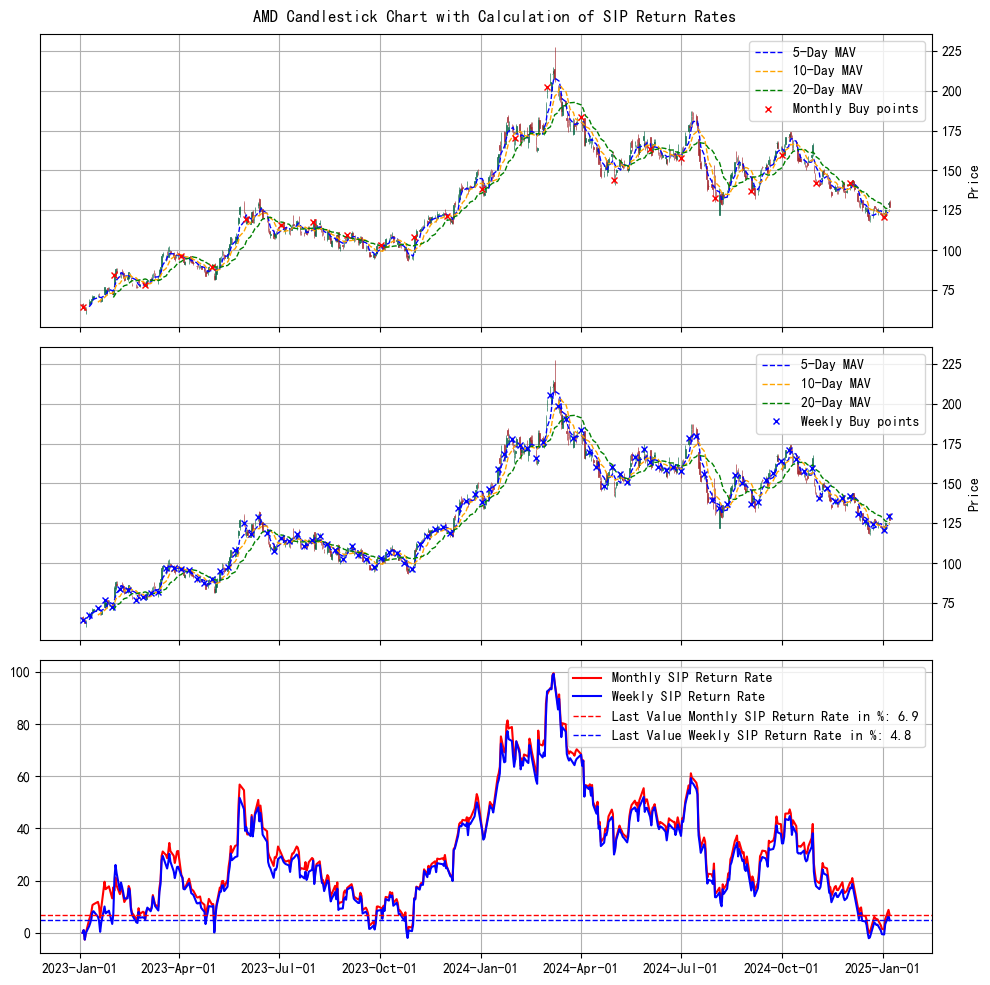

按MA5定投收益率 %:3.3
按MA10定投收益率 %:1.2
按MA20定投收益率 %:0.4
按MA5和MA10的交叉定投收益率 %:-2.3
按MA10和MA20的交叉定投收益率 %:3.1


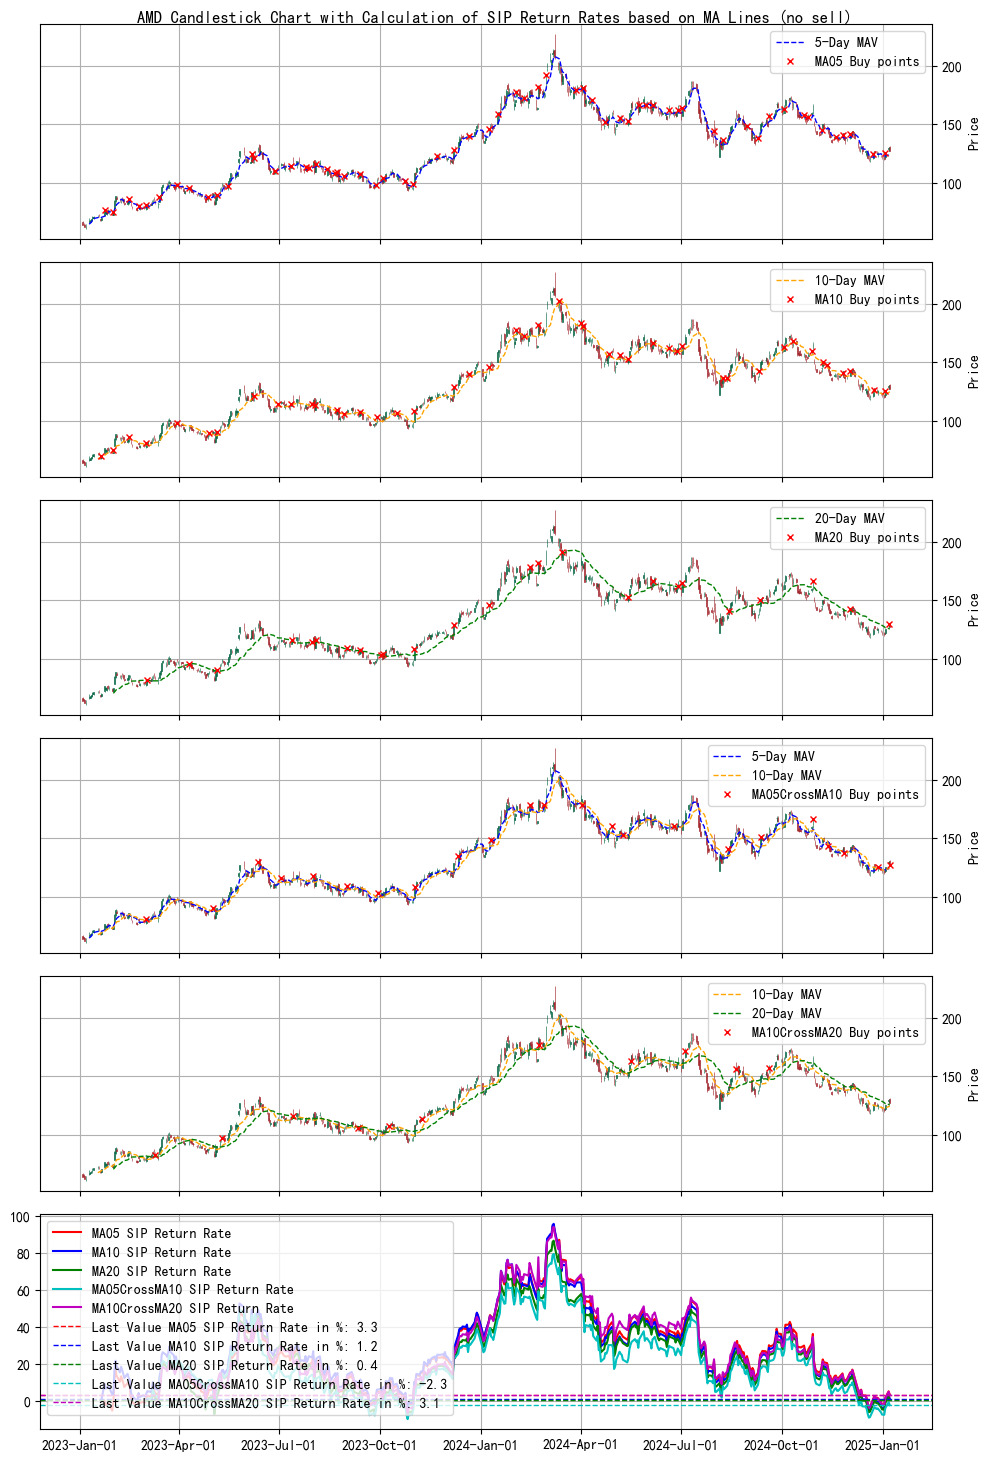

按MA5定投收益率 %:1.0
按MA10定投收益率 %:24.3
按MA20定投收益率 %:23.0
按MA5和MA10的交叉定投收益率 %:38.3


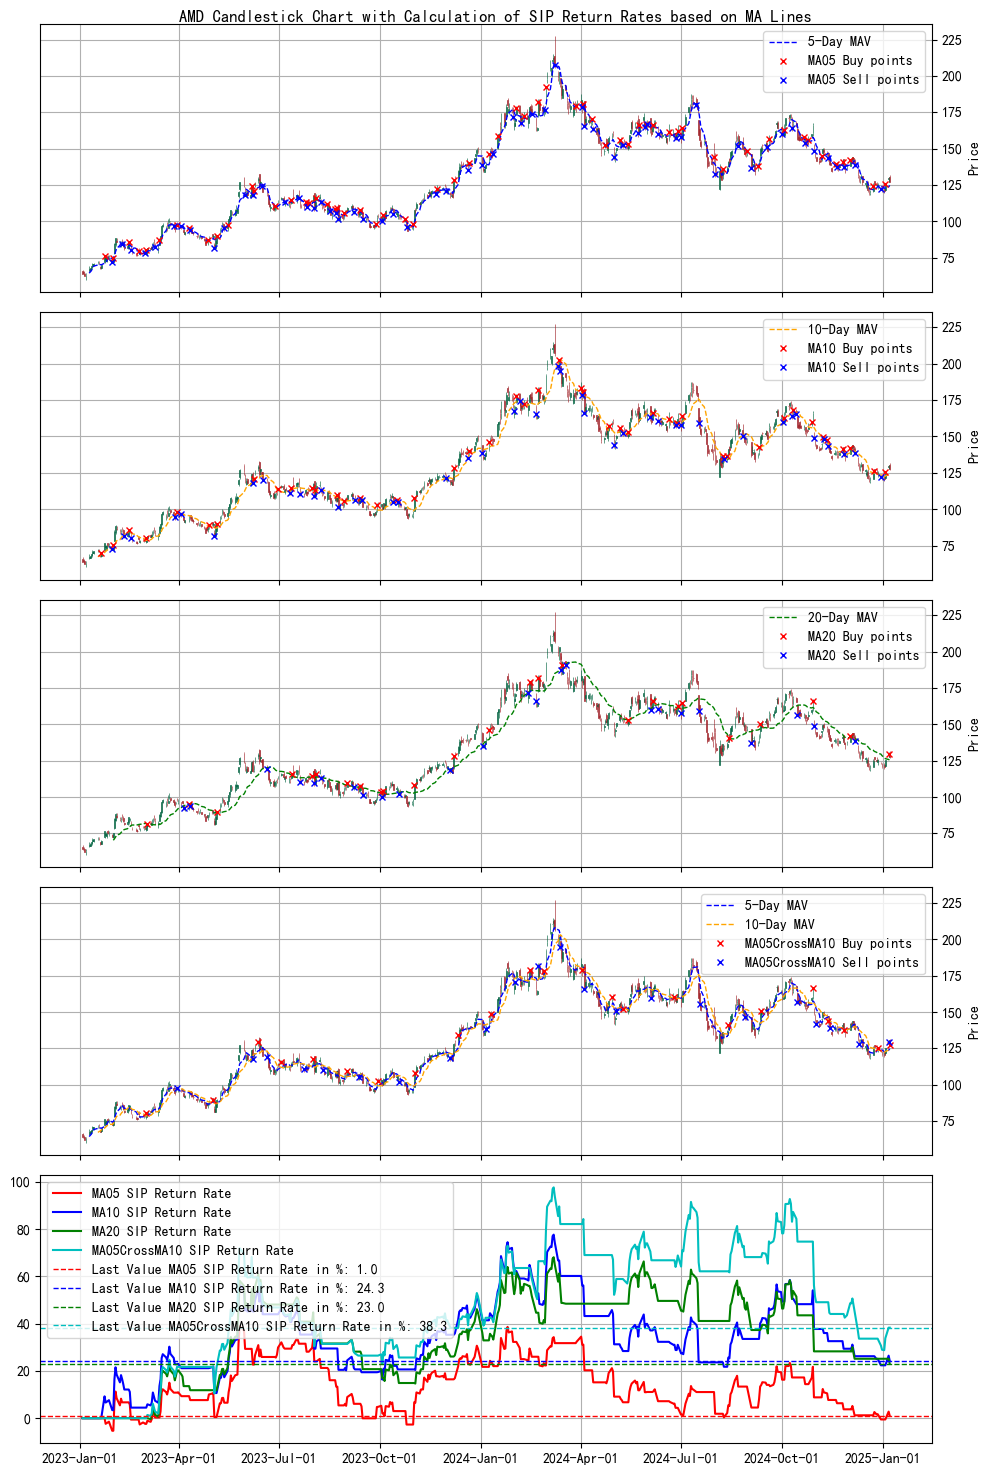

按BB上下轨投资收益率 %:62.1


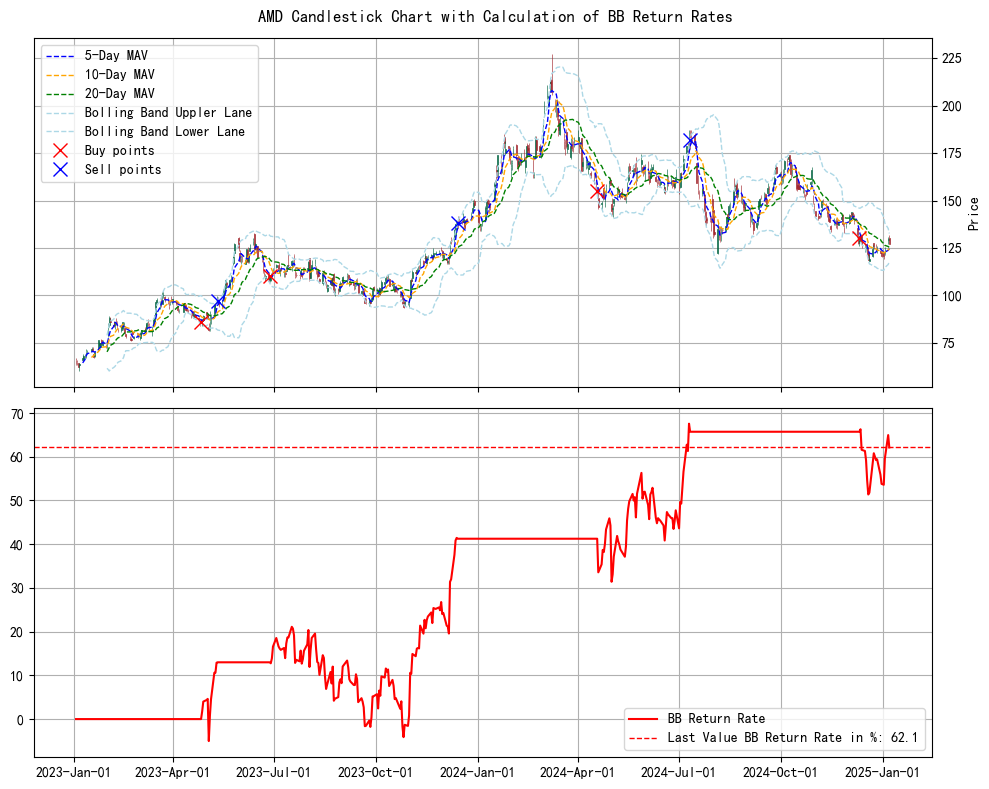

按MACD金叉死叉投资收益率 %:66.0


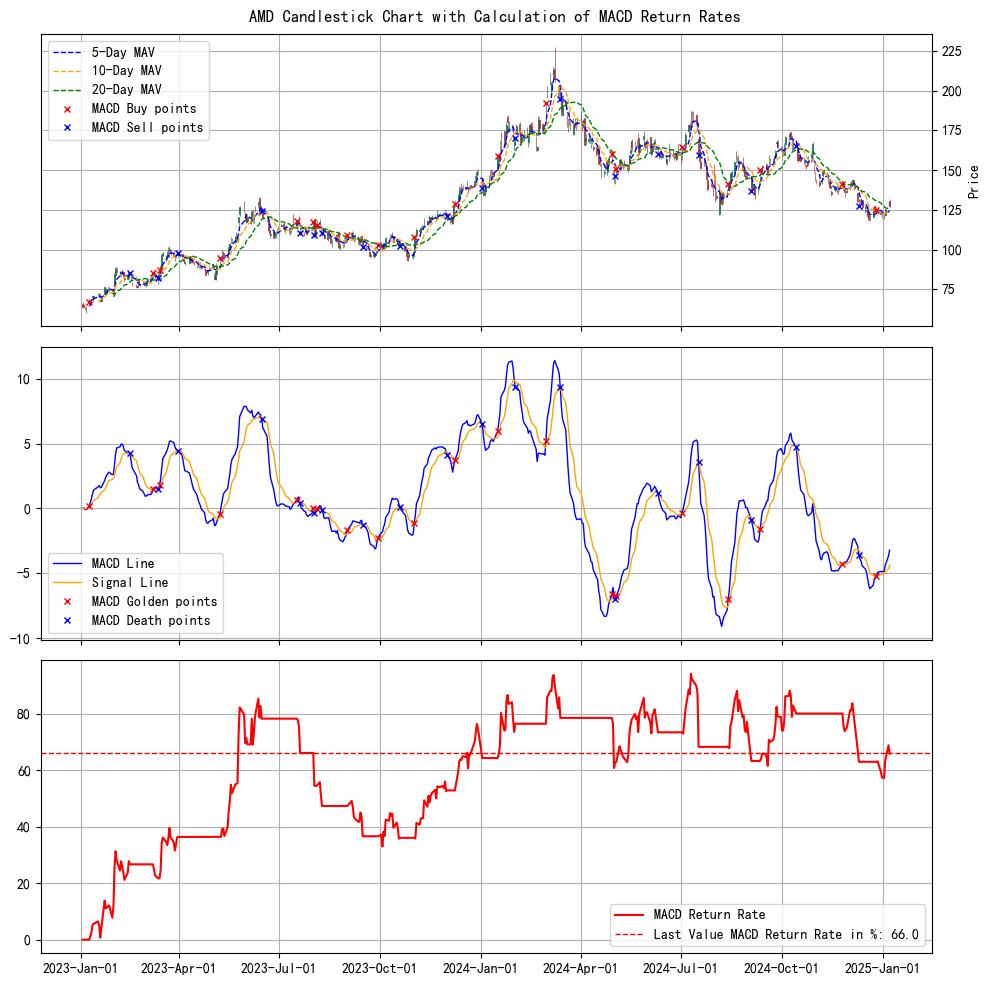

In [13]:
%matplotlib inline
end_date = datetime.date.today() + pd.offsets.BusinessDay(1)
SIPReturnCalcn('AMD','2023-01-01',end_date)

In [12]:

date_Today = datetime.date.today()
date_Next_day = date_Today + pd.offsets.BusinessDay(1)
ReturnRateRes = Main_Calcn('2024-01-01',date_Next_day)
ReturnRateRes.to_csv('ReturnRateRes.csv',index=True)


Elapsed time: 1.3162 seconds
Elapsed time: 1.3572 seconds
Elapsed time: 1.3255 seconds
Elapsed time: 1.3171 seconds
Elapsed time: 1.3476 seconds
Elapsed time: 1.3436 seconds
Elapsed time: 1.3605 seconds
Elapsed time: 1.3330 seconds
Elapsed time: 1.3560 seconds
Elapsed time: 1.2459 seconds
Elapsed time: 1.2288 seconds
Elapsed time: 1.2459 seconds
Elapsed time: 1.2623 seconds
Elapsed time: 1.2576 seconds
Elapsed time: 1.2717 seconds
Elapsed time: 1.2935 seconds
Elapsed time: 1.2761 seconds
Elapsed time: 1.2560 seconds
Elapsed time: 1.2787 seconds
Elapsed time: 1.3626 seconds
Elapsed time: 1.2825 seconds
Elapsed time: 1.2958 seconds
Elapsed time: 1.2624 seconds
Elapsed time: 1.3057 seconds
Elapsed time: 1.3346 seconds
Elapsed time: 1.3099 seconds
Elapsed time: 1.3275 seconds
Elapsed time: 1.2771 seconds
Elapsed time: 1.2429 seconds
Elapsed time: 1.2859 seconds
Elapsed time: 1.3037 seconds
Elapsed time: 1.2548 seconds
Error on BollBandsReturnCalcn: index 0 is out of bounds for axis 0 with 

In [34]:
# 月定投
top_20 = ReturnRateRes.sort_values(by='Return Rate of MonthlySIP',ascending=False).head(20)
top_20_indices_and_values = top_20[['Return Rate of MonthlySIP']].reset_index()
print(f'按照月定投收益最高的公司(TOP20)列表如下:\n{top_20_indices_and_values}')
# 周定投
top_20 = ReturnRateRes.sort_values(by='Return Rate of WeeklySIP',ascending=False).head(20)
top_20_indices_and_values = top_20[['Return Rate of WeeklySIP']].reset_index()
print(f'按照周定投收益最高的公司(TOP20)列表如下:\n{top_20_indices_and_values}')
# MA05
top_20 = ReturnRateRes.sort_values(by='Return Rate of MA05',ascending=False).head(20)
top_20_indices_and_values = top_20[['Return Rate of MA05']].reset_index()
print(f'按照5日均线金叉死叉交易收益最高的公司(TOP20)列表如下:\n{top_20_indices_and_values}')
# MA10
top_20 = ReturnRateRes.sort_values(by='Return Rate of MA10',ascending=False).head(20)
top_20_indices_and_values = top_20[['Return Rate of MA10']].reset_index()
print(f'按照10日均线金叉死叉交易收益最高的公司(TOP20)列表如下:\n{top_20_indices_and_values}')
# MA20
top_20 = ReturnRateRes.sort_values(by='Return Rate of MA20',ascending=False).head(20)
top_20_indices_and_values = top_20[['Return Rate of MA20']].reset_index()
print(f'按照20日均线金叉死叉交易收益最高的公司(TOP20)列表如下:\n{top_20_indices_and_values}')
# MA5CrossMA10
top_20 = ReturnRateRes.sort_values(by='Return Rate of MA5CrossMA10',ascending=False).head(20)
top_20_indices_and_values = top_20[['Return Rate of MA5CrossMA10']].reset_index()
print(f'按照5日10日均线金叉死叉交易收益最高的公司(TOP20)列表如下:\n{top_20_indices_and_values}')
# 最佳买入时机股票
top_20 = ReturnRateRes.sort_values(by='Distance of Close2BBLowerLim',ascending=True).head(20)
top_20_indices_and_values = top_20[['Distance of Close2BBLowerLim']].reset_index()
print(f'距离布林带下轨距离最小的股票(TOP20)列表如下:\n{top_20_indices_and_values}')

按照月定投收益最高的公司(TOP20)列表如下:
     Ticker Return Rate of MonthlySIP
0      PLTR                184.363457
1       VST                119.528823
2     XIACF                100.217752
3       UAL                 88.683095
4      TSLA                 85.429104
5       GEV                 84.102653
6       TPL                 75.081267
7      AXON                 70.496421
8      AVGO                 63.790755
9   BTC-USD                 61.557913
10     NVDA                  57.99252
11      TPR                 52.570401
12     TRGP                 51.364245
13     ANET                 49.631499
14      RCL                 47.846452
15      TSM                 47.713789
16      SYF                 45.682843
17     GDDY                 44.801858
18      HWM                 42.599726
19      CEG                 42.463936
按照周定投收益最高的公司(TOP20)列表如下:
     Ticker Return Rate of WeeklySIP
0      PLTR               171.674288
1       VST               115.523736
2     XIACF               101.420117
3   

In [30]:
print(ReturnRateRes.columns)


Index(['Return Rate of MA05', 'Return Rate of MA10', 'Return Rate of MA20',
       'Return Rate of MonthlySIP', 'Return Rate of WeeklySIP',
       'Distance of Close2BBLowerLim', 'Return Rate of MA5CrossMA10',
       'Return Rate of MA05_WoSell', 'Return Rate of MA10_WoSell',
       'Return Rate of MA20_WoSell', 'Return Rate of MA05CrossMA10_WoSell',
       'Return Rate of MA10CrossMA20_WoSell', 'Return Rate of MACD',
       'Return Rate of BB'],
      dtype='object')


In [18]:
import pandas as pd

# 假设你的DataFrame名为df，key variable名为'key_variable'
df = pd.DataFrame({
    'key_variable': [10, 20, 5, 15, 25, 30, 2, 8, 12, 18, 22, 1],
    'other_column': range(12)
})

# 按key_variable排序并提取前10行的index
top_10_indices = df.nsmallest(10, 'key_variable').index

print(top_10_indices)


Index([11, 6, 2, 7, 0, 8, 3, 9, 1, 10], dtype='int64')
